In [2]:
import jax
import jax.numpy as jnp
from flax import nnx
from functools import partial
import optax

In [ ]:
class RBM(nnx.Module):
    def __init__(self, n_vnodes: int, n_hnodes: int, rngs: nnx.Rngs, use_gpu: bool):
        self.n_vnodes = n_vnodes
        self.n_hnodes = n_hnodes
        self.W = nnx.Param(jax.random.uniform(key, (self.n_vnodes, self.n_hnodes)))
        self.b = nnx.Param(jnp.zeros((self.n_vnodes,)))
        self.c = nnx.Param(jnp.zeros((self.n_hnodes,)))
        
    def energy(self, v: jax.Array, h: jax.Array) -> jax.Array:
        r"""
        E \left( \vb*{v}, \vb*{h}, \vb*{\theta} \right)
        &= - \vb*{b}^\top \vb*{v} - \vb*{c}^\top \vb*{h} - \vb*{v}^\top \vb*{W} \vb*{h}
        """
        f_term = jnp.inner(self.b, v)
        s_term = jnp.inner(self.c, h)
        t_term = jnp.inner(v, jnp.dot(self.W, h))

        return -(f_term + s_term + t_term)
        
    def free_energy(self, ):
        r"""
        $$
        F \left(  \right)
        &= 
        $$
        """

    def prob_v_given_h(self, h: jax.Array) -> jax.Array:
        r"""
        P \left( v_i | \vb*{h}, vb*{\theta} \right)
        &= \frac{\exp \left\{ \left( b_i + \sum_j w_{ij} h_j \right) v_i \right\}}{1 + \exp \left( b_i + \sum_j w_{ij} h_j \right)}
        """
        top = jax.lax.exp((b+jnp.dot(weights, h))*v)
        bottom = 1 + jax.lax.exp(b+jnp.dot(weights, h))
        
        return jax.lax.clamp(0.0, top/bottom, 1.0)

    def sample_v_given_h(self, prob_v: jax.Array) -> jax.Array:
        r"""

        """
        return jax.random.bernoulli(key, p=prob_v).astype(jnp.int32)

    def prob_h_given_v(self, v: jax.Array) -> jax.Array:
        top = jax.lax.exp((b+jnp.dot(weights, h))*v)
        bottom = 1 + jax.lax.exp(b+jnp.dot(weights, h))
        
        return jax.lax.clamp(0.0, top/bottom, 1.0)

    def sample_h_given_v(self, prob_h: jax.Array) -> jax.Array:
        r"""

        """
        return jax.random.bernoulli(key, p=prob_h).astype(jnp.int32)

def gibbs_sampling():

def contrastive_divergence():

class ComplexWavefunction:

In [3]:
n_vnode = 10**6
n_hnode = 10

key = jax.random.PRNGKey(2025)
v = jax.random.bernoulli(key, p=0.5, shape=(n_vnode,)).astype(jnp.int32)
h = jax.random.bernoulli(key, p=0.5, shape=(n_hnode,)).astype(jnp.int32)
weights = jax.random.uniform(key, shape=(n_vnode, n_hnode))
b = jax.random.uniform(key, shape=(n_vnode,))
c = jax.random.uniform(key, shape=(n_hnode,))

In [4]:
top = jax.lax.exp((b+jnp.dot(weights, h))*v)
bottom = 1 + jax.lax.exp(b+jnp.dot(weights, h))
#jax.lax.clamp(0.0, top/bottom, 1.0)

In [5]:
n_qubit = 5
n_sample = 100

dataset = jax.random.bernoulli(key, p=0.5, shape=(n_sample, n_qubit)).astype(jnp.int32)

In [6]:
def prob_v_given_h(h):
    top = jax.lax.exp((b+jnp.dot(weights, h))*v)
    bottom = 1 + jax.lax.exp(b+jnp.dot(weights, h))
    return jax.lax.clamp(0.0, top/bottom, 1.0)

In [7]:
@jax.vmap
def sample_v_given_h(prob_vi):
    return jax.random.bernoulli(key, p=prob_vi, shape=(1,)).astype(jnp.int32).squeeze()

In [9]:
%timeit sample_v_given_h(prob_v_given_h(h))

1.41 ms ± 13.7 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [83]:
def sample_v_given_h(prob_v):
    return jax.random.bernoulli(key, p=prob_v).astype(jnp.int32)

In [84]:
%timeit sample_v_given_h(prob_v_given_h(h))

774 μs ± 5.46 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [2]:
import jax
import jax.numpy as jnp
import flax.nnx as nnx
import numpy as np
from typing import Tuple, Optional, Dict, Any
from functools import partial
import matplotlib.pyplot as plt

class RBM(nnx.Module):
    """Restricted Boltzmann Machine for quantum wavefunction reconstruction."""
    
    def __init__(self, num_visible: int, num_hidden: int, rngs: nnx.Rngs):
        """
        Initialize RBM.
        
        Args:
            num_visible: Number of visible units (qubits)
            num_hidden: Number of hidden units
            rngs: Random number generator state
        """
        self.num_visible = num_visible
        self.num_hidden = num_hidden
        
        # Initialize weights and biases
        self.W = nnx.Param(
            jax.random.normal(rngs.params(), (num_visible, num_hidden)) * 0.01
        )
        self.a = nnx.Param(jnp.zeros(num_visible))  # visible bias
        self.b = nnx.Param(jnp.zeros(num_hidden))   # hidden bias
    
    def visible_to_hidden(self, v: jnp.ndarray) -> jnp.ndarray:
        """Compute hidden unit activations given visible units."""
        return jnp.dot(v, self.W.value) + self.b.value
    
    def hidden_to_visible(self, h: jnp.ndarray) -> jnp.ndarray:
        """Compute visible unit activations given hidden units."""
        return jnp.dot(h, self.W.value.T) + self.a.value
    
    def sample_hidden_given_visible(self, v: jnp.ndarray, key: jax.random.PRNGKey) -> jnp.ndarray:
        """Sample hidden units given visible units."""
        h_prob = jax.nn.sigmoid(self.visible_to_hidden(v))
        return jax.random.bernoulli(key, h_prob).astype(jnp.float32)
    
    def sample_visible_given_hidden(self, h: jnp.ndarray, key: jax.random.PRNGKey) -> jnp.ndarray:
        """Sample visible units given hidden units."""
        v_prob = jax.nn.sigmoid(self.hidden_to_visible(h))
        return jax.random.bernoulli(key, v_prob).astype(jnp.float32)
    
    def gibbs_step(self, v: jnp.ndarray, key: jax.random.PRNGKey) -> Tuple[jnp.ndarray, jnp.ndarray]:
        """Perform one Gibbs sampling step."""
        key1, key2 = jax.random.split(key)
        h = self.sample_hidden_given_visible(v, key1)
        v_new = self.sample_visible_given_hidden(h, key2)
        return v_new, h
    
    def log_probability(self, v: jnp.ndarray) -> jnp.ndarray:
        """Compute log probability of visible configuration."""
        # For positive wavefunction: log|ψ(v)|² = 2 * Re[log ψ(v)]
        hidden_term = jnp.sum(jnp.log(1 + jnp.exp(self.visible_to_hidden(v))))
        visible_term = jnp.dot(v, self.a.value)
        return 2 * (visible_term + hidden_term)  # Factor of 2 for |ψ|²


class PositiveWavefunction(nnx.Module):
    """Positive real wavefunction using RBM."""
    
    def __init__(self, num_visible: int, num_hidden: int, rngs: nnx.Rngs):
        self.rbm = RBM(num_visible, num_hidden, rngs)
        self.num_visible = num_visible
    
    def log_amplitude(self, v: jnp.ndarray) -> jnp.ndarray:
        """Compute log amplitude of wavefunction."""
        hidden_term = jnp.sum(jnp.log(1 + jnp.exp(self.rbm.visible_to_hidden(v))))
        visible_term = jnp.dot(v, self.rbm.a.value)
        return visible_term + hidden_term
    
    def amplitude(self, v: jnp.ndarray) -> jnp.ndarray:
        """Compute amplitude of wavefunction."""
        return jnp.exp(self.log_amplitude(v))
    
    def probability(self, v: jnp.ndarray) -> jnp.ndarray:
        """Compute probability |ψ(v)|²."""
        return jnp.exp(2 * self.log_amplitude(v))
    
    def sample(self, num_samples: int, num_chains: int, key: jax.random.PRNGKey) -> jnp.ndarray:
        """Generate samples using Gibbs sampling."""
        # Initialize random configurations
        key, subkey = jax.random.split(key)
        v = jax.random.bernoulli(subkey, 0.5, (num_chains, self.num_visible)).astype(jnp.float32)
        
        samples = []
        for i in range(num_samples):
            key, subkey = jax.random.split(key)
            v, _ = self.rbm.gibbs_step(v, subkey)
            if i >= num_samples // 2:  # Burn-in period
                samples.append(v)
        
        return jnp.concatenate(samples, axis=0)


def contrastive_divergence_loss(model: PositiveWavefunction, 
                               data_batch: jnp.ndarray, 
                               k: int,
                               key: jax.random.PRNGKey) -> jnp.ndarray:
    """Compute contrastive divergence loss."""
    batch_size = data_batch.shape[0]
    
    # Positive phase
    pos_hidden_prob = jax.nn.sigmoid(model.rbm.visible_to_hidden(data_batch))
    
    # Negative phase - k steps of Gibbs sampling
    v_neg = data_batch
    for _ in range(k):
        key, subkey = jax.random.split(key)
        v_neg, _ = jax.vmap(model.rbm.gibbs_step, in_axes=(0, None))(v_neg, subkey)
    
    neg_hidden_prob = jax.nn.sigmoid(model.rbm.visible_to_hidden(v_neg))
    
    # Compute gradients for CD
    pos_weights_grad = jnp.mean(data_batch[:, :, None] * pos_hidden_prob[:, None, :], axis=0)
    neg_weights_grad = jnp.mean(v_neg[:, :, None] * neg_hidden_prob[:, None, :], axis=0)
    
    pos_visible_grad = jnp.mean(data_batch, axis=0)
    neg_visible_grad = jnp.mean(v_neg, axis=0)
    
    pos_hidden_grad = jnp.mean(pos_hidden_prob, axis=0)
    neg_hidden_grad = jnp.mean(neg_hidden_prob, axis=0)
    
    # Compute loss (negative log-likelihood approximation)
    loss = (jnp.sum((pos_weights_grad - neg_weights_grad)**2) + 
            jnp.sum((pos_visible_grad - neg_visible_grad)**2) + 
            jnp.sum((pos_hidden_grad - neg_hidden_grad)**2))
    
    return loss


def compute_fidelity(model: PositiveWavefunction, 
                    true_psi: jnp.ndarray, 
                    hilbert_space: jnp.ndarray) -> float:
    """Compute fidelity between reconstructed and true wavefunction."""
    # Get model amplitudes
    model_amplitudes = jax.vmap(model.amplitude)(hilbert_space)
    
    # Normalize both wavefunctions
    model_norm = jnp.sqrt(jnp.sum(model_amplitudes**2))
    true_norm = jnp.sqrt(jnp.sum(true_psi**2))
    
    model_normalized = model_amplitudes / model_norm
    true_normalized = true_psi / true_norm
    
    # Compute fidelity |<ψ_true|ψ_model>|²
    overlap = jnp.abs(jnp.sum(jnp.conj(true_normalized) * model_normalized))**2
    return float(overlap)


def train_step(model: PositiveWavefunction, 
               optimizer: nnx.Optimizer,
               data_batch: jnp.ndarray,
               k: int,
               key: jax.random.PRNGKey) -> float:
    """Perform one training step."""
    
    def loss_fn(model):
        return contrastive_divergence_loss(model, data_batch, k, key)
    
    loss, grads = nnx.value_and_grad(loss_fn)(model)
    optimizer.update(grads)
    
    return float(loss)


class QuCumberTrainer:
    """Trainer for quantum wavefunction reconstruction."""
    
    def __init__(self, 
                 num_visible: int,
                 num_hidden: int,
                 learning_rate: float = 0.01,
                 seed: int = 42):
        self.key = jax.random.PRNGKey(seed)
        
        # Initialize model
        self.key, model_key = jax.random.split(self.key)
        rngs = nnx.Rngs(model_key)
        self.model = PositiveWavefunction(num_visible, num_hidden, rngs)
        
        # Initialize optimizer
        self.optimizer = nnx.Optimizer(self.model, optax.adam(learning_rate))
        
    def train(self, 
              train_data: np.ndarray,
              true_psi: Optional[np.ndarray] = None,
              epochs: int = 100,
              batch_size: int = 32,
              k: int = 1,
              verbose: bool = True) -> Dict[str, list]:
        """Train the model."""
        
        train_data = jnp.array(train_data)
        history = {'loss': [], 'fidelity': []}
        
        # Generate Hilbert space for fidelity calculation
        if true_psi is not None:
            hilbert_space = jnp.array([
                [int(b) for b in format(i, f'0{self.model.num_visible}b')]
                for i in range(2**self.model.num_visible)
            ]).astype(jnp.float32)
            true_psi = jnp.array(true_psi)
        
        num_batches = len(train_data) // batch_size
        
        for epoch in range(epochs):
            epoch_loss = 0.0
            
            # Shuffle data
            self.key, subkey = jax.random.split(self.key)
            perm = jax.random.permutation(subkey, len(train_data))
            shuffled_data = train_data[perm]
            
            for batch_idx in range(num_batches):
                batch_start = batch_idx * batch_size
                batch_end = batch_start + batch_size
                batch_data = shuffled_data[batch_start:batch_end]
                
                self.key, subkey = jax.random.split(self.key)
                loss = train_step(self.model, self.optimizer, batch_data, k, subkey)
                epoch_loss += loss
            
            avg_loss = epoch_loss / num_batches
            history['loss'].append(avg_loss)
            
            # Compute fidelity if true wavefunction provided
            if true_psi is not None:
                fidelity = compute_fidelity(self.model, true_psi, hilbert_space)
                history['fidelity'].append(fidelity)
            else:
                history['fidelity'].append(0.0)
            
            if verbose and epoch % 10 == 0:
                if true_psi is not None:
                    print(f"Epoch {epoch+1}: Loss = {avg_loss:.6f}, Fidelity = {fidelity:.6f}")
                else:
                    print(f"Epoch {epoch+1}: Loss = {avg_loss:.6f}")
        
        return history
    
    def generate_samples(self, num_samples: int, num_chains: int = 10) -> np.ndarray:
        """Generate samples from the trained model."""
        self.key, subkey = jax.random.split(self.key)
        samples = self.model.sample(num_samples, num_chains, subkey)
        return np.array(samples)


# Example usage and demonstration
def create_tfim_data(num_qubits: int, h: float, num_samples: int = 1000) -> Tuple[np.ndarray, np.ndarray]:
    """Create synthetic TFIM data for demonstration."""
    # This is a simplified example - in practice you'd use exact diagonalization
    # or quantum Monte Carlo to generate training data
    
    # For demonstration, create random binary data
    np.random.seed(42)
    data = np.random.randint(0, 2, (num_samples, num_qubits)).astype(np.float32)
    
    # Create a simple "true" wavefunction (normalized random amplitudes)
    true_psi = np.random.random(2**num_qubits).astype(np.float32)
    true_psi = true_psi / np.linalg.norm(true_psi)
    
    return data, true_psi


def plot_training_history(history: Dict[str, list]):
    """Plot training loss and fidelity."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    ax1.plot(history['loss'])
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training Loss')
    ax1.set_yscale('log')
    
    ax2.plot(history['fidelity'])
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Fidelity')
    ax2.set_title('Reconstruction Fidelity')
    
    plt.tight_layout()
    plt.show()


# Import optax for optimizers
try:
    import optax
except ImportError:
    print("Please install optax: pip install optax")


if __name__ == "__main__":
    # Demonstration
    print("JAX QuCumber: Pure State Reconstruction")
    print("=" * 40)
    
    # Parameters
    num_qubits = 4
    num_hidden = 8
    h_field = 1.0
    
    # Generate training data
    print("Generating training data...")
    train_data, true_psi = create_tfim_data(num_qubits, h_field, num_samples=2000)
    
    # Initialize trainer
    print("Initializing trainer...")
    trainer = QuCumberTrainer(
        num_visible=num_qubits,
        num_hidden=num_hidden,
        learning_rate=0.01
    )
    
    # Train model
    print("Training model...")
    history = trainer.train(
        train_data=train_data,
        true_psi=true_psi,
        epochs=100,
        batch_size=64,
        k=1,
        verbose=True
    )
    
    # Generate samples
    print("\nGenerating samples from trained model...")
    generated_samples = trainer.generate_samples(num_samples=500)
    print(f"Generated {len(generated_samples)} samples")
    
    # Plot results
    print("\nFinal fidelity:", history['fidelity'][-1])
    
    # Display some statistics
    print(f"\nTraining data statistics:")
    print(f"Mean magnetization: {np.mean(np.sum(train_data, axis=1))}")
    print(f"Generated data statistics:")
    print(f"Mean magnetization: {np.mean(np.sum(generated_samples, axis=1))}")

JAX QuCumber: Pure State Reconstruction
Generating training data...
Initializing trainer...
Training model...
Epoch 1: Loss = 2.294414, Fidelity = 0.615251
Epoch 11: Loss = 0.999232, Fidelity = 0.660537
Epoch 21: Loss = 0.981186, Fidelity = 0.731453
Epoch 31: Loss = 0.914040, Fidelity = 0.749632
Epoch 41: Loss = 0.978682, Fidelity = 0.753717
Epoch 51: Loss = 0.962633, Fidelity = 0.753071
Epoch 61: Loss = 0.966015, Fidelity = 0.751138
Epoch 71: Loss = 0.989560, Fidelity = 0.748920
Epoch 81: Loss = 0.976888, Fidelity = 0.746586
Epoch 91: Loss = 0.952689, Fidelity = 0.744592

Generating samples from trained model...
Generated 2500 samples

Final fidelity: 0.7428755760192871

Training data statistics:
Mean magnetization: 1.9895000457763672
Generated data statistics:
Mean magnetization: 1.9012000560760498


In [3]:
import jax
import jax.numpy as jnp
import flax.nnx as nnx
import numpy as np
from typing import Tuple, Optional, Dict, Any
from functools import partial
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

class RBM(nnx.Module):
    """Restricted Boltzmann Machine for quantum wavefunction reconstruction."""
    
    def __init__(self, num_visible: int, num_hidden: int, rngs: nnx.Rngs):
        """
        Initialize RBM.
        
        Args:
            num_visible: Number of visible units (qubits)
            num_hidden: Number of hidden units
            rngs: Random number generator state
        """
        self.num_visible = num_visible
        self.num_hidden = num_hidden
        
        # Initialize weights and biases
        self.W = nnx.Param(
            jax.random.normal(rngs.params(), (num_visible, num_hidden)) * 0.01
        )
        self.a = nnx.Param(jnp.zeros(num_visible))  # visible bias
        self.b = nnx.Param(jnp.zeros(num_hidden))   # hidden bias
    
    def visible_to_hidden(self, v: jnp.ndarray) -> jnp.ndarray:
        """Compute hidden unit activations given visible units."""
        return jnp.dot(v, self.W.value) + self.b.value
    
    def hidden_to_visible(self, h: jnp.ndarray) -> jnp.ndarray:
        """Compute visible unit activations given hidden units."""
        return jnp.dot(h, self.W.value.T) + self.a.value
    
    def sample_hidden_given_visible(self, v: jnp.ndarray, key: jax.random.PRNGKey) -> jnp.ndarray:
        """Sample hidden units given visible units."""
        h_prob = jax.nn.sigmoid(self.visible_to_hidden(v))
        return jax.random.bernoulli(key, h_prob).astype(jnp.float32)
    
    def sample_visible_given_hidden(self, h: jnp.ndarray, key: jax.random.PRNGKey) -> jnp.ndarray:
        """Sample visible units given hidden units."""
        v_prob = jax.nn.sigmoid(self.hidden_to_visible(h))
        return jax.random.bernoulli(key, v_prob).astype(jnp.float32)
    
    def gibbs_step(self, v: jnp.ndarray, key: jax.random.PRNGKey) -> Tuple[jnp.ndarray, jnp.ndarray]:
        """Perform one Gibbs sampling step."""
        key1, key2 = jax.random.split(key)
        h = self.sample_hidden_given_visible(v, key1)
        v_new = self.sample_visible_given_hidden(h, key2)
        return v_new, h
    
    def log_probability(self, v: jnp.ndarray) -> jnp.ndarray:
        """Compute log probability of visible configuration."""
        # For positive wavefunction: log|ψ(v)|² = 2 * Re[log ψ(v)]
        hidden_term = jnp.sum(jnp.log(1 + jnp.exp(self.visible_to_hidden(v))))
        visible_term = jnp.dot(v, self.a.value)
        return 2 * (visible_term + hidden_term)  # Factor of 2 for |ψ|²


class PositiveWavefunction(nnx.Module):
    """Positive real wavefunction using RBM."""
    
    def __init__(self, num_visible: int, num_hidden: int, rngs: nnx.Rngs):
        self.rbm = RBM(num_visible, num_hidden, rngs)
        self.num_visible = num_visible
    
    def log_amplitude(self, v: jnp.ndarray) -> jnp.ndarray:
        """Compute log amplitude of wavefunction."""
        hidden_term = jnp.sum(jnp.log(1 + jnp.exp(self.rbm.visible_to_hidden(v))))
        visible_term = jnp.dot(v, self.rbm.a.value)
        return visible_term + hidden_term
    
    def amplitude(self, v: jnp.ndarray) -> jnp.ndarray:
        """Compute amplitude of wavefunction."""
        return jnp.exp(self.log_amplitude(v))
    
    def probability(self, v: jnp.ndarray) -> jnp.ndarray:
        """Compute probability |ψ(v)|²."""
        return jnp.exp(2 * self.log_amplitude(v))
    
    def sample(self, num_samples: int, num_chains: int, key: jax.random.PRNGKey) -> jnp.ndarray:
        """Generate samples using Gibbs sampling."""
        # Initialize random configurations
        key, subkey = jax.random.split(key)
        v = jax.random.bernoulli(subkey, 0.5, (num_chains, self.num_visible)).astype(jnp.float32)
        
        samples = []
        for i in range(num_samples):
            key, subkey = jax.random.split(key)
            v, _ = self.rbm.gibbs_step(v, subkey)
            if i >= num_samples // 2:  # Burn-in period
                samples.append(v)
        
        return jnp.concatenate(samples, axis=0)


def contrastive_divergence_loss(model: PositiveWavefunction, 
                               data_batch: jnp.ndarray, 
                               k: int,
                               key: jax.random.PRNGKey) -> jnp.ndarray:
    """Compute contrastive divergence loss."""
    batch_size = data_batch.shape[0]
    
    # Positive phase
    pos_hidden_prob = jax.nn.sigmoid(model.rbm.visible_to_hidden(data_batch))
    
    # Negative phase - k steps of Gibbs sampling
    v_neg = data_batch
    for _ in range(k):
        key, subkey = jax.random.split(key)
        v_neg, _ = jax.vmap(model.rbm.gibbs_step, in_axes=(0, None))(v_neg, subkey)
    
    neg_hidden_prob = jax.nn.sigmoid(model.rbm.visible_to_hidden(v_neg))
    
    # Compute gradients for CD
    pos_weights_grad = jnp.mean(data_batch[:, :, None] * pos_hidden_prob[:, None, :], axis=0)
    neg_weights_grad = jnp.mean(v_neg[:, :, None] * neg_hidden_prob[:, None, :], axis=0)
    
    pos_visible_grad = jnp.mean(data_batch, axis=0)
    neg_visible_grad = jnp.mean(v_neg, axis=0)
    
    pos_hidden_grad = jnp.mean(pos_hidden_prob, axis=0)
    neg_hidden_grad = jnp.mean(neg_hidden_prob, axis=0)
    
    # Compute loss (negative log-likelihood approximation)
    loss = (jnp.sum((pos_weights_grad - neg_weights_grad)**2) + 
            jnp.sum((pos_visible_grad - neg_visible_grad)**2) + 
            jnp.sum((pos_hidden_grad - neg_hidden_grad)**2))
    
    return loss


def compute_fidelity(model: PositiveWavefunction, 
                    true_psi: jnp.ndarray, 
                    hilbert_space: jnp.ndarray) -> float:
    """Compute fidelity between reconstructed and true wavefunction."""
    # Get model amplitudes
    model_amplitudes = jax.vmap(model.amplitude)(hilbert_space)
    
    # Normalize both wavefunctions
    model_norm = jnp.sqrt(jnp.sum(model_amplitudes**2))
    true_norm = jnp.sqrt(jnp.sum(true_psi**2))
    
    model_normalized = model_amplitudes / model_norm
    true_normalized = true_psi / true_norm
    
    # Compute fidelity |<ψ_true|ψ_model>|²
    overlap = jnp.abs(jnp.sum(jnp.conj(true_normalized) * model_normalized))**2
    return float(overlap)


def train_step(model: PositiveWavefunction, 
               optimizer: nnx.Optimizer,
               data_batch: jnp.ndarray,
               k: int,
               key: jax.random.PRNGKey) -> float:
    """Perform one training step."""
    
    def loss_fn(model):
        return contrastive_divergence_loss(model, data_batch, k, key)
    
    loss, grads = nnx.value_and_grad(loss_fn)(model)
    optimizer.update(grads)
    
    return float(loss)


class QuCumberTrainer:
    """Trainer for quantum wavefunction reconstruction."""
    
    def __init__(self, 
                 num_visible: int,
                 num_hidden: int,
                 learning_rate: float = 0.01,
                 seed: int = 42):
        self.key = jax.random.PRNGKey(seed)
        
        # Initialize model
        self.key, model_key = jax.random.split(self.key)
        rngs = nnx.Rngs(model_key)
        self.model = PositiveWavefunction(num_visible, num_hidden, rngs)
        
        # Initialize optimizer
        self.optimizer = nnx.Optimizer(self.model, optax.adam(learning_rate))
        
    def train(self, 
              train_data: np.ndarray,
              true_psi: Optional[np.ndarray] = None,
              epochs: int = 100,
              batch_size: int = 32,
              k: int = 1,
              verbose: bool = True,
              progress_bar: bool = True) -> Dict[str, list]:
        """Train the model."""
        
        train_data = jnp.array(train_data)
        history = {'loss': [], 'fidelity': []}
        
        # Generate Hilbert space for fidelity calculation
        if true_psi is not None:
            hilbert_space = jnp.array([
                [int(b) for b in format(i, f'0{self.model.num_visible}b')]
                for i in range(2**self.model.num_visible)
            ]).astype(jnp.float32)
            true_psi = jnp.array(true_psi)
        
        num_batches = len(train_data) // batch_size
        
        # Initialize progress bar
        if progress_bar:
            epoch_iterator = tqdm(range(epochs), desc="Training", unit="epoch")
        else:
            epoch_iterator = range(epochs)
        
        for epoch in epoch_iterator:
            epoch_loss = 0.0
            
            # Shuffle data
            self.key, subkey = jax.random.split(self.key)
            perm = jax.random.permutation(subkey, len(train_data))
            shuffled_data = train_data[perm]
            
            # Progress bar for batches within epoch
            if progress_bar and verbose:
                batch_iterator = tqdm(range(num_batches), 
                                    desc=f"Epoch {epoch+1}/{epochs}", 
                                    leave=False, 
                                    unit="batch")
            else:
                batch_iterator = range(num_batches)
            
            for batch_idx in batch_iterator:
                batch_start = batch_idx * batch_size
                batch_end = batch_start + batch_size
                batch_data = shuffled_data[batch_start:batch_end]
                
                self.key, subkey = jax.random.split(self.key)
                loss = train_step(self.model, self.optimizer, batch_data, k, subkey)
                epoch_loss += loss
                
                # Update batch progress bar with current loss
                if progress_bar and verbose and hasattr(batch_iterator, 'set_postfix'):
                    batch_iterator.set_postfix({'batch_loss': f'{loss:.4f}'})
            
            avg_loss = epoch_loss / num_batches
            history['loss'].append(avg_loss)
            
            # Compute fidelity if true wavefunction provided
            if true_psi is not None:
                fidelity = compute_fidelity(self.model, true_psi, hilbert_space)
                history['fidelity'].append(fidelity)
            else:
                history['fidelity'].append(0.0)
            
            # Update epoch progress bar
            if progress_bar:
                postfix_dict = {'loss': f'{avg_loss:.6f}'}
                if true_psi is not None:
                    postfix_dict['fidelity'] = f'{fidelity:.6f}'
                epoch_iterator.set_postfix(postfix_dict)
            
            # Print periodic updates if verbose but no progress bar
            elif verbose and epoch % 10 == 0:
                if true_psi is not None:
                    print(f"Epoch {epoch}: Loss = {avg_loss:.6f}, Fidelity = {fidelity:.6f}")
                else:
                    print(f"Epoch {epoch}: Loss = {avg_loss:.6f}")
        
        if progress_bar:
            epoch_iterator.close()
        
        return history
    
    def generate_samples(self, num_samples: int, num_chains: int = 10) -> np.ndarray:
        """Generate samples from the trained model."""
        self.key, subkey = jax.random.split(self.key)
        samples = self.model.sample(num_samples, num_chains, subkey)
        return np.array(samples)


# Example usage and demonstration
def create_tfim_data(num_qubits: int, h: float, num_samples: int = 1000) -> Tuple[np.ndarray, np.ndarray]:
    """Create synthetic TFIM data for demonstration."""
    # This is a simplified example - in practice you'd use exact diagonalization
    # or quantum Monte Carlo to generate training data
    
    # For demonstration, create random binary data
    np.random.seed(42)
    data = np.random.randint(0, 2, (num_samples, num_qubits)).astype(np.float32)
    
    # Create a simple "true" wavefunction (normalized random amplitudes)
    true_psi = np.random.random(2**num_qubits).astype(np.float32)
    true_psi = true_psi / np.linalg.norm(true_psi)
    
    return data, true_psi


def plot_training_history(history: Dict[str, list]):
    """Plot training loss and fidelity."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    ax1.plot(history['loss'])
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training Loss')
    ax1.set_yscale('log')
    
    ax2.plot(history['fidelity'])
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Fidelity')
    ax2.set_title('Reconstruction Fidelity')
    
    plt.tight_layout()
    plt.show()


# Import required libraries
try:
    import optax
except ImportError:
    print("Please install optax: pip install optax")

try:
    from tqdm.auto import tqdm
except ImportError:
    print("Please install tqdm for progress bars: pip install tqdm")
    # Fallback to simple range if tqdm is not available
    tqdm = range


if __name__ == "__main__":
    # Demonstration
    print("JAX QuCumber: Pure State Reconstruction")
    print("=" * 40)
    
    # Parameters
    num_qubits = 4
    num_hidden = 8
    h_field = 1.0
    
    # Generate training data
    print("Generating training data...")
    train_data, true_psi = create_tfim_data(num_qubits, h_field, num_samples=2000)
    
    # Initialize trainer
    print("Initializing trainer...")
    trainer = QuCumberTrainer(
        num_visible=num_qubits,
        num_hidden=num_hidden,
        learning_rate=0.01
    )
    
    # Train model
    print("Training model...")
    history = trainer.train(
        train_data=train_data,
        true_psi=true_psi,
        epochs=100,
        batch_size=64,
        k=1,
        verbose=True,
        progress_bar=True  # Enable progress bars
    )
    
    # Generate samples
    print("\nGenerating samples from trained model...")
    generated_samples = trainer.generate_samples(num_samples=500)
    print(f"Generated {len(generated_samples)} samples")
    
    # Plot results
    print("\nFinal fidelity:", history['fidelity'][-1])
    
    # Display some statistics
    print(f"\nTraining data statistics:")
    print(f"Mean magnetization: {np.mean(np.sum(train_data, axis=1))}")
    print(f"Generated data statistics:")
    print(f"Mean magnetization: {np.mean(np.sum(generated_samples, axis=1))}")

JAX QuCumber: Pure State Reconstruction
Generating training data...
Initializing trainer...
Training model...


Training:   0%|          | 0/100 [00:00<?, ?epoch/s]

Epoch 1/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 2/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 3/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 4/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 5/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 6/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 7/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 8/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 9/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 10/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 11/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 12/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 13/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 14/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 15/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 16/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 17/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 18/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 19/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 20/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 21/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 22/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 23/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 24/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 25/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 26/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 27/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 28/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 29/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 30/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 31/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 32/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 33/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 34/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 35/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 36/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 37/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 38/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 39/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 40/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 41/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 42/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 43/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 44/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 45/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 46/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 47/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 48/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 49/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 50/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 51/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 52/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 53/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 54/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 55/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 56/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 57/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 58/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 59/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 60/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 61/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 62/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 63/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 64/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 65/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 66/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 67/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 68/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 69/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 70/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 71/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 72/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 73/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 74/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 75/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 76/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 77/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 78/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 79/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 80/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 81/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 82/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 83/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 84/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 85/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 86/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 87/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 88/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 89/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 90/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 91/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 92/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 93/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 94/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 95/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 96/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 97/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 98/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 99/100:   0%|          | 0/31 [00:00<?, ?batch/s]

Epoch 100/100:   0%|          | 0/31 [00:00<?, ?batch/s]


Generating samples from trained model...
Generated 2500 samples

Final fidelity: 0.7428755760192871

Training data statistics:
Mean magnetization: 1.9895000457763672
Generated data statistics:
Mean magnetization: 1.9012000560760498


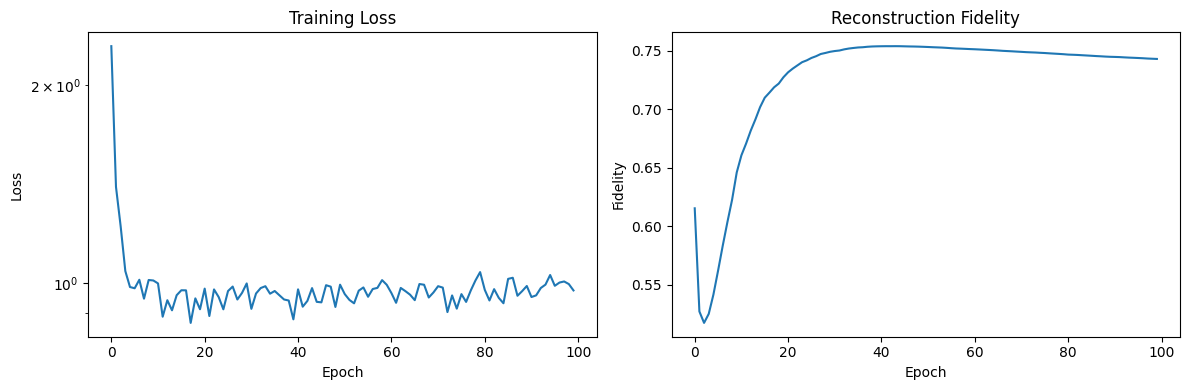

In [4]:
plot_training_history(history)

In [5]:
!scalene --help

/bin/bash: line 1: scalene: command not found


/usr/lib64/python3.11/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [6]:
!pip install scalene

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [7]:
!pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 32.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.1
    Uninstalling pip-25.1:
      Successfully uninstalled pip-25.1
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [9]:
!python -m pip install scalene

Defaulting to user installation because normal site-packages is not writeable


In [10]:
!python -m pip install pytest

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!